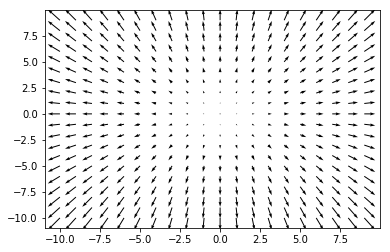

In [1]:
#Quiver Simple Demo

#A simple example of a quiver plot with a quiverkey.

import matplotlib.pyplot as plt
import numpy as np

X = np.arange(-10, 10, 1)
Y = np.arange(-10, 10, 1)
U, V = np.meshgrid(X, Y)

fig, ax = plt.subplots()
q = ax.quiver(X, Y, U, V)
ax.quiverkey(q, X=0.3, Y=1.1, U=10,
             label='Quiver key, length = 10', labelpos='E')

plt.show()



In [3]:
#Figimage Demo

#This illustrates placing images directly in the figure, with no axes.

import numpy as np
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt


fig = plt.figure()
Z = np.arange(10000).reshape((100, 100))
Z[:, 50:] = 1

im1 = fig.figimage(Z, xo=50, yo=0, origin='lower')
im2 = fig.figimage(Z, xo=100, yo=100, alpha=.8, origin='lower')

plt.show()

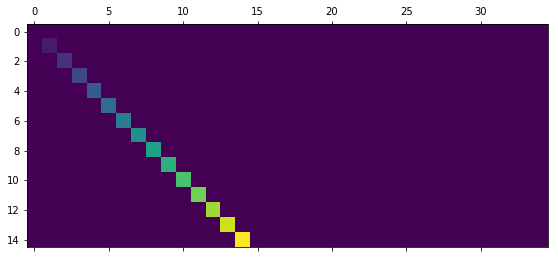

In [4]:
#Matshow

#Simple matshow() example.


import matplotlib.pyplot as plt
import numpy as np


def samplemat(dims):
    """Make a matrix with all zeros and increasing elements on the diagonal"""
    aa = np.zeros(dims)
    for i in range(min(dims)):
        aa[i, i] = i
    return aa


# Display matrix
plt.matshow(samplemat((15, 35)))

plt.show()

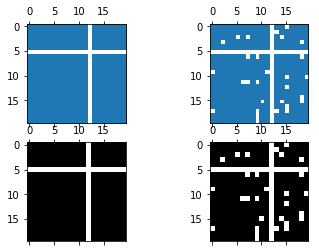

In [5]:
#Spy Demos

#Plot the sparsity pattern of arrays

import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 2)
ax1 = axs[0, 0]
ax2 = axs[0, 1]
ax3 = axs[1, 0]
ax4 = axs[1, 1]

x = np.random.randn(20, 20)
x[5, :] = 0.
x[:, 12] = 0.

ax1.spy(x, markersize=5)
ax2.spy(x, precision=0.1, markersize=5)

ax3.spy(x)
ax4.spy(x, precision=0.1)

plt.show()

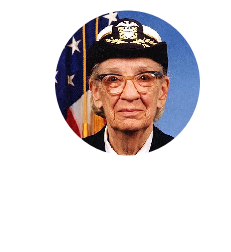

In [6]:
#Clipping images with patches

#Demo of image that’s been clipped by a circular patch.

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cbook as cbook


with cbook.get_sample_data('grace_hopper.png') as image_file:
    image = plt.imread(image_file)

fig, ax = plt.subplots()
im = ax.imshow(image)
patch = patches.Circle((260, 200), radius=200, transform=ax.transData)
im.set_clip_path(patch)

ax.axis('off')
plt.show()

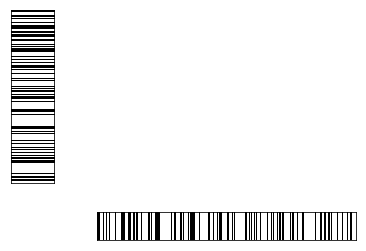

In [7]:
#Barcode Demo

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


# the bar
x = np.where(np.random.rand(500) > 0.7, 1.0, 0.0)

axprops = dict(xticks=[], yticks=[])
barprops = dict(aspect='auto', cmap=plt.cm.binary, interpolation='nearest')

fig = plt.figure()

# a vertical barcode -- this is broken at present
ax = fig.add_axes([0.1, 0.3, 0.1, 0.6], **axprops)
ax.imshow(x.reshape((-1, 1)), **barprops)

# a horizontal barcode
ax = fig.add_axes([0.3, 0.1, 0.6, 0.1], **axprops)
ax.imshow(x.reshape((1, -1)), **barprops)


plt.show()

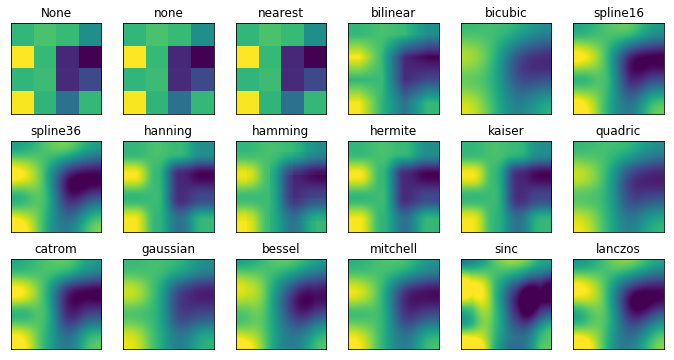

In [8]:
#Interpolations for imshow/matshow

import matplotlib.pyplot as plt
import numpy as np

methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

# Fixing random state for reproducibility
np.random.seed(19680801)

grid = np.random.rand(4, 4)

fig, axes = plt.subplots(3, 6, figsize=(12, 6),
                         subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=0.3, wspace=0.05)

for ax, interp_method in zip(axes.flat, methods):
    ax.imshow(grid, interpolation=interp_method, cmap='viridis')
    ax.set_title(interp_method)

plt.show()

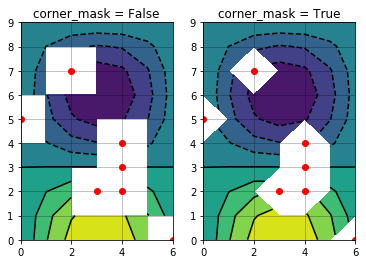

In [9]:
#Contour Corner Mask

#Illustrate the difference between corner_mask=False and corner_mask=True for masked contour plots.

import matplotlib.pyplot as plt
import numpy as np

# Data to plot.
x, y = np.meshgrid(np.arange(7), np.arange(10))
z = np.sin(0.5 * x) * np.cos(0.52 * y)

# Mask various z values.
mask = np.zeros_like(z, dtype=bool)
mask[2, 3:5] = True
mask[3:5, 4] = True
mask[7, 2] = True
mask[5, 0] = True
mask[0, 6] = True
z = np.ma.array(z, mask=mask)

corner_masks = [False, True]
for i, corner_mask in enumerate(corner_masks):
    plt.subplot(1, 2, i + 1)
    cs = plt.contourf(x, y, z, corner_mask=corner_mask)
    plt.contour(cs, colors='k')
    plt.title('corner_mask = {0}'.format(corner_mask))

    # Plot grid.
    plt.grid(c='k', ls='-', alpha=0.3)

    # Indicate masked points with red circles.
    plt.plot(np.ma.array(x, mask=~mask), y, 'ro')

plt.show()

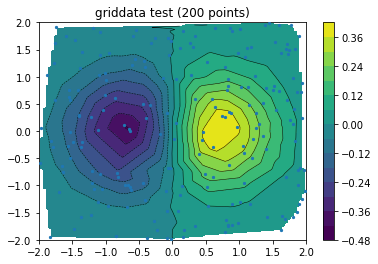

In [10]:
#Griddata Demo

from matplotlib.mlab import griddata
import matplotlib.pyplot as plt
import numpy as np

# make up data.
random_state = np.random.RandomState(19680801)

npts = 200
x = random_state.uniform(-2, 2, npts)
y = random_state.uniform(-2, 2, npts)
z = x*np.exp(-x**2 - y**2)
# define grid.
xi = np.linspace(-2.1, 2.1, 100)
yi = np.linspace(-2.1, 2.1, 200)
# grid the data.
zi = griddata(x, y, z, xi, yi, interp='linear')
# contour the gridded data, plotting dots at the nonuniform data points.
CS = plt.contour(xi, yi, zi, 15, linewidths=0.5, colors='k')
CS = plt.contourf(xi, yi, zi, 15,
                  vmax=abs(zi).max(), vmin=-abs(zi).max())
plt.colorbar()  # draw colorbar
# plot data points.
plt.scatter(x, y, marker='o', s=5, zorder=10)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title('griddata test (%d points)' % npts)
plt.show()

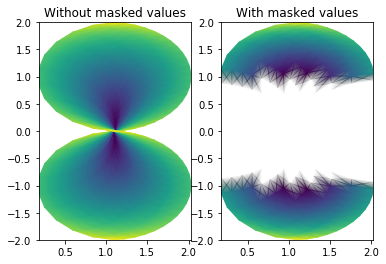

In [11]:
#QuadMesh Demo

#pcolormesh uses a QuadMesh, a faster generalization of pcolor, but with some restrictions.

#This demo illustrates a bug in quadmesh with masked data.

import numpy as np
from matplotlib.pyplot import figure, show, savefig
from matplotlib import cm, colors
from numpy import ma

n = 12
x = np.linspace(-1.5, 1.5, n)
y = np.linspace(-1.5, 1.5, n * 2)
X, Y = np.meshgrid(x, y)
Qx = np.cos(Y) - np.cos(X)
Qz = np.sin(Y) + np.sin(X)
Qx = (Qx + 1.1)
Z = np.sqrt(X**2 + Y**2) / 5
Z = (Z - Z.min()) / (Z.max() - Z.min())

# The color array can include masked values:
Zm = ma.masked_where(np.abs(Qz) < 0.5 * np.max(Qz), Z)

fig = figure()
ax = fig.add_subplot(121)
ax.pcolormesh(Qx, Qz, Z, shading='gouraud')
ax.set_title('Without masked values')

ax = fig.add_subplot(122)
#  You can control the color of the masked region:
# cmap = cm.RdBu
# cmap.set_bad('y', 1.0)
# ax.pcolormesh(Qx, Qz, Zm, cmap=cmap)
#  Or use the default, which is transparent:
col = ax.pcolormesh(Qx, Qz, Zm, shading='gouraud')
ax.set_title('With masked values')


show()

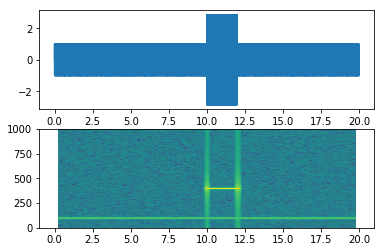

In [12]:
#Spectrogram Demo

#Demo of a spectrogram plot.

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


dt = 0.0005
t = np.arange(0.0, 20.0, dt)
s1 = np.sin(2 * np.pi * 100 * t)
s2 = 2 * np.sin(2 * np.pi * 400 * t)

# create a transient "chirp"
mask = np.where(np.logical_and(t > 10, t < 12), 1.0, 0.0)
s2 = s2 * mask

# add some noise into the mix
nse = 0.01 * np.random.random(size=len(t))

x = s1 + s2 + nse  # the signal
NFFT = 1024       # the length of the windowing segments
Fs = int(1.0 / dt)  # the sampling frequency

# Pxx is the segments x freqs array of instantaneous power, freqs is
# the frequency vector, bins are the centers of the time bins in which
# the power is computed, and im is the matplotlib.image.AxesImage
# instance

ax1 = plt.subplot(211)
plt.plot(t, x)
plt.subplot(212, sharex=ax1)
Pxx, freqs, bins, im = plt.specgram(x, NFFT=NFFT, Fs=Fs, noverlap=900)
plt.show()

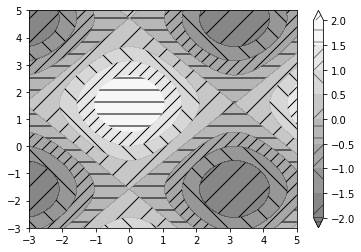

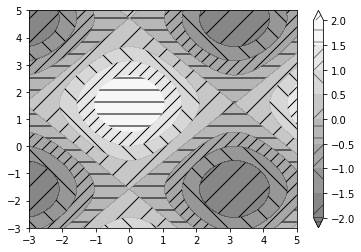

In [15]:
#Contourf Hatching

#Demo filled contour plots with hatched patterns.

import matplotlib.pyplot as plt
import numpy as np

# invent some numbers, turning the x and y arrays into simple
# 2d arrays, which make combining them together easier.
x = np.linspace(-3, 5, 150).reshape(1, -1)
y = np.linspace(-3, 5, 120).reshape(-1, 1)
z = np.cos(x) + np.sin(y)

# we no longer need x and y to be 2 dimensional, so flatten them.
x, y = x.flatten(), y.flatten()
#Plot 1: the simplest hatched plot with a colorbar

fig = plt.figure()
cs = plt.contourf(x, y, z, hatches=['-', '/', '\\', '//'],
                  cmap=plt.get_cmap('gray'),
                  extend='both', alpha=0.5
                  )
plt.colorbar()
plt.show()

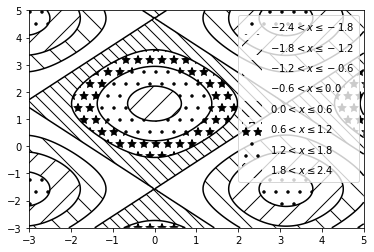

In [16]:
#Plot 2: a plot of hatches without color with a legend

plt.figure()
n_levels = 6
plt.contour(x, y, z, n_levels, colors='black', linestyles='-')
cs = plt.contourf(x, y, z, n_levels, colors='none',
                  hatches=['.', '/', '\\', None, '\\\\', '*'],
                  extend='lower'
                  )

# create a legend for the contour set
artists, labels = cs.legend_elements()
plt.legend(artists, labels, handleheight=2)


plt.show()

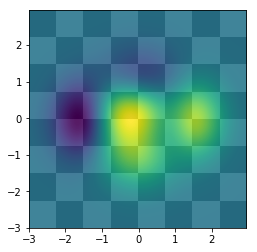

In [17]:
#Layer Images

#Layer images above one another using alpha blending

from __future__ import division
import matplotlib.pyplot as plt
import numpy as np


def func3(x, y):
    return (1 - x / 2 + x**5 + y**3) * np.exp(-(x**2 + y**2))


# make these smaller to increase the resolution
dx, dy = 0.05, 0.05

x = np.arange(-3.0, 3.0, dx)
y = np.arange(-3.0, 3.0, dy)
X, Y = np.meshgrid(x, y)

# when layering multiple images, the images need to have the same
# extent.  This does not mean they need to have the same shape, but
# they both need to render to the same coordinate system determined by
# xmin, xmax, ymin, ymax.  Note if you use different interpolations
# for the images their apparent extent could be different due to
# interpolation edge effects

extent = np.min(x), np.max(x), np.min(y), np.max(y)
fig = plt.figure(frameon=False)

Z1 = np.add.outer(range(8), range(8)) % 2  # chessboard
im1 = plt.imshow(Z1, cmap=plt.cm.gray, interpolation='nearest',
                 extent=extent)

Z2 = func3(X, Y)

im2 = plt.imshow(Z2, cmap=plt.cm.viridis, alpha=.9, interpolation='bilinear',
                 extent=extent)

plt.show()

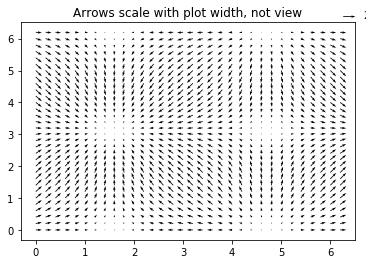

In [18]:
#Demonstration of advanced quiver and quiverkey functions

#Known problem: the plot autoscaling does not take into account the arrows, so those on the boundaries are often out of the picture. This is not an easy problem to solve in a perfectly general way. The workaround is to manually expand the axes.

import matplotlib.pyplot as plt
import numpy as np
from numpy import ma

X, Y = np.meshgrid(np.arange(0, 2 * np.pi, .2), np.arange(0, 2 * np.pi, .2))
U = np.cos(X)
V = np.sin(Y)
plt.figure()
plt.title('Arrows scale with plot width, not view')
Q = plt.quiver(X, Y, U, V, units='width')
qk = plt.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')

plt.show()

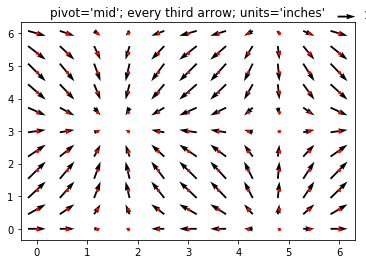

In [19]:
plt.figure()
plt.title("pivot='mid'; every third arrow; units='inches'")
Q = plt.quiver(X[::3, ::3], Y[::3, ::3], U[::3, ::3], V[::3, ::3],
               pivot='mid', units='inches')
qk = plt.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
plt.scatter(X[::3, ::3], Y[::3, ::3], color='r', s=5)

plt.show()

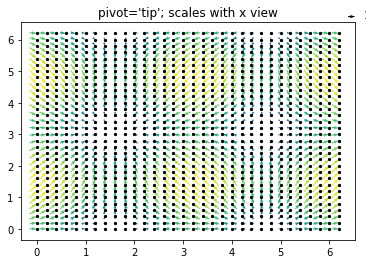

In [20]:
plt.figure()
plt.title("pivot='tip'; scales with x view")
M = np.hypot(U, V)
Q = plt.quiver(X, Y, U, V, M, units='x', pivot='tip', width=0.022,
               scale=1 / 0.15)
qk = plt.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
plt.scatter(X, Y, color='k', s=5)

plt.show()

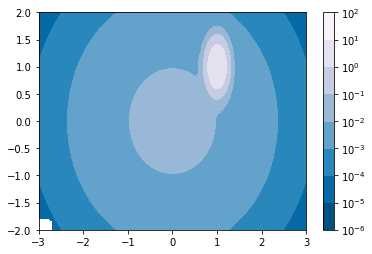

In [21]:
#Contourf and log color scale

#Demonstrate use of a log color scale in contourf

import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import ticker, cm
from matplotlib.mlab import bivariate_normal

N = 100
x = np.linspace(-3.0, 3.0, N)
y = np.linspace(-2.0, 2.0, N)

X, Y = np.meshgrid(x, y)

# A low hump with a spike coming out of the top right.
# Needs to have z/colour axis on a log scale so we see both hump and spike.
# linear scale only shows the spike.
z = (bivariate_normal(X, Y, 0.1, 0.2, 1.0, 1.0)
     + 0.1 * bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0))

# Put in some negative values (lower left corner) to cause trouble with logs:
z[:5, :5] = -1

# The following is not strictly essential, but it will eliminate
# a warning.  Comment it out to see the warning.
z = ma.masked_where(z <= 0, z)


# Automatic selection of levels works; setting the
# log locator tells contourf to use a log scale:
fig, ax = plt.subplots()
cs = ax.contourf(X, Y, z, locator=ticker.LogLocator(), cmap=cm.PuBu_r)

# Alternatively, you can manually set the levels
# and the norm:
#lev_exp = np.arange(np.floor(np.log10(z.min())-1),
#                    np.ceil(np.log10(z.max())+1))
#levs = np.power(10, lev_exp)
#cs = P.contourf(X, Y, z, levs, norm=colors.LogNorm())

# The 'extend' kwarg does not work yet with a log scale.

cbar = fig.colorbar(cs)

plt.show()

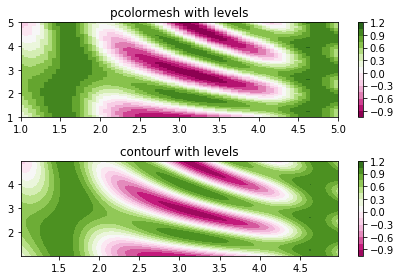

In [22]:
#pcolormesh

#Shows how to combine Normalization and Colormap instances to draw “levels” in pcolor, 
#pcolormesh and imshow type plots in a similar way to the levels keyword argument to contour/contourf.

import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np


# make these smaller to increase the resolution
dx, dy = 0.05, 0.05

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[slice(1, 5 + dy, dy),
                slice(1, 5 + dx, dx)]

z = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)

# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())


# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

fig, (ax0, ax1) = plt.subplots(nrows=2)

im = ax0.pcolormesh(x, y, z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax0)
ax0.set_title('pcolormesh with levels')


# contours are *point* based plots, so convert our bound into point
# centers
cf = ax1.contourf(x[:-1, :-1] + dx/2.,
                  y[:-1, :-1] + dy/2., z, levels=levels,
                  cmap=cmap)
fig.colorbar(cf, ax=ax1)
ax1.set_title('contourf with levels')

# adjust spacing between subplots so `ax1` title and `ax0` tick labels
# don't overlap
fig.tight_layout()

plt.show()

griddata and contour: 0.086753 seconds
tricontour: 0.076727 seconds


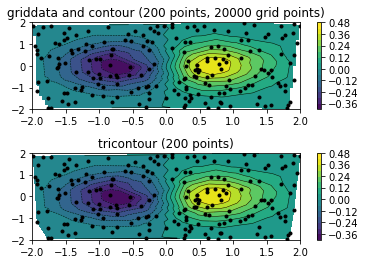

In [23]:
#Tricontour Vs Griddata

#Comparison of griddata and tricontour for an unstructured triangular grid.

#Out:
#griddata and contour: 0.059032 seconds
#tricontour: 0.049517 seconds

from __future__ import print_function
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import matplotlib.mlab as mlab
import time

np.random.seed(0)
npts = 200
ngridx = 100
ngridy = 200
x = np.random.uniform(-2, 2, npts)
y = np.random.uniform(-2, 2, npts)
z = x * np.exp(-x**2 - y**2)

# griddata and contour.
start = time.clock()
plt.subplot(211)
xi = np.linspace(-2.1, 2.1, ngridx)
yi = np.linspace(-2.1, 2.1, ngridy)
zi = mlab.griddata(x, y, z, xi, yi, interp='linear')
plt.contour(xi, yi, zi, 15, linewidths=0.5, colors='k')
plt.contourf(xi, yi, zi, 15,
             norm=plt.Normalize(vmax=abs(zi).max(), vmin=-abs(zi).max()))
plt.colorbar()  # draw colorbar
plt.plot(x, y, 'ko', ms=3)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title('griddata and contour (%d points, %d grid points)' %
          (npts, ngridx * ngridy))
print('griddata and contour: %f seconds' % (time.clock() - start))

# tricontour.
start = time.clock()
plt.subplot(212)
triang = tri.Triangulation(x, y)
plt.tricontour(x, y, z, 15, linewidths=0.5, colors='k')
plt.tricontourf(x, y, z, 15,
                norm=plt.Normalize(vmax=abs(zi).max(), vmin=-abs(zi).max()))
plt.colorbar()
plt.plot(x, y, 'ko', ms=3)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title('tricontour (%d points)' % npts)
print('tricontour: %f seconds' % (time.clock() - start))

plt.subplots_adjust(hspace=0.5)

plt.show()

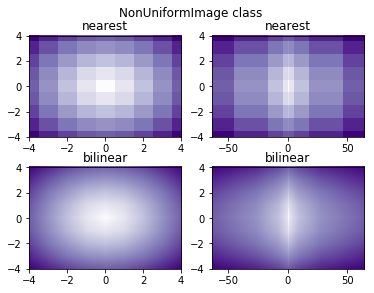

In [24]:
#Image Nonuniform

#This illustrates the NonUniformImage class. It is not available via an Axes method but it is easily added to an Axes instance as shown here.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import NonUniformImage
from matplotlib import cm

interp = 'nearest'

# Linear x array for cell centers:
x = np.linspace(-4, 4, 9)

# Highly nonlinear x array:
x2 = x**3

y = np.linspace(-4, 4, 9)

z = np.sqrt(x[np.newaxis, :]**2 + y[:, np.newaxis]**2)

fig, axs = plt.subplots(nrows=2, ncols=2)
fig.subplots_adjust(bottom=0.07, hspace=0.3)
fig.suptitle('NonUniformImage class', fontsize='large')
ax = axs[0, 0]
im = NonUniformImage(ax, interpolation=interp, extent=(-4, 4, -4, 4),
                     cmap=cm.Purples)
im.set_data(x, y, z)
ax.images.append(im)
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_title(interp)

ax = axs[0, 1]
im = NonUniformImage(ax, interpolation=interp, extent=(-64, 64, -4, 4),
                     cmap=cm.Purples)
im.set_data(x2, y, z)
ax.images.append(im)
ax.set_xlim(-64, 64)
ax.set_ylim(-4, 4)
ax.set_title(interp)

interp = 'bilinear'

ax = axs[1, 0]
im = NonUniformImage(ax, interpolation=interp, extent=(-4, 4, -4, 4),
                     cmap=cm.Purples)
im.set_data(x, y, z)
ax.images.append(im)
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_title(interp)

ax = axs[1, 1]
im = NonUniformImage(ax, interpolation=interp, extent=(-64, 64, -4, 4),
                     cmap=cm.Purples)
im.set_data(x2, y, z)
ax.images.append(im)
ax.set_xlim(-64, 64)
ax.set_ylim(-4, 4)
ax.set_title(interp)

plt.show()

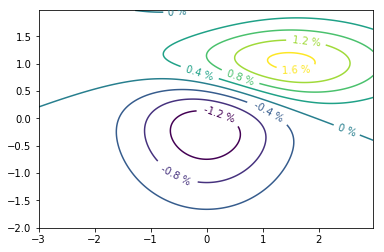

In [26]:
#Contour Label Demo

#Illustrate some of the more advanced things that one can do with contour labels.

#See also contour_demo.py.

import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
#Define our surface

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
# difference of Gaussians
Z = 10.0 * (Z2 - Z1)
#Make contour labels using creative float classes Follows suggestion of Manuel Metz

plt.figure()

# Basic contour plot
CS = plt.contour(X, Y, Z)


# Define a class that forces representation of float to look a certain way
# This remove trailing zero so '1.0' becomes '1'
class nf(float):
    def __repr__(self):
        str = '%.1f' % (self.__float__(),)
        if str[-1] == '0':
            return '%.0f' % self.__float__()
        else:
            return '%.1f' % self.__float__()


# Recast levels to new class
CS.levels = [nf(val) for val in CS.levels]

# Label levels with specially formatted floats
if plt.rcParams["text.usetex"]:
    fmt = r'%r \%%'
else:
    fmt = '%r %%'
plt.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10)

plt.show()

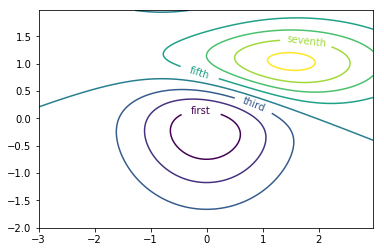

In [27]:
#Label contours with arbitrary strings using a dictionary

plt.figure()

# Basic contour plot
CS = plt.contour(X, Y, Z)

fmt = {}
strs = ['first', 'second', 'third', 'fourth', 'fifth', 'sixth', 'seventh']
for l, s in zip(CS.levels, strs):
    fmt[l] = s

# Label every other level using strings
plt.clabel(CS, CS.levels[::2], inline=True, fmt=fmt, fontsize=10)

plt.show()

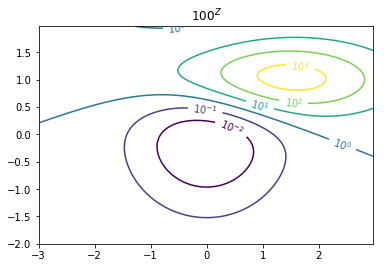

In [28]:
#Use a Formatter

plt.figure()

CS = plt.contour(X, Y, 100**Z, locator=plt.LogLocator())
fmt = ticker.LogFormatterMathtext()
fmt.create_dummy_axis()
plt.clabel(CS, CS.levels, fmt=fmt)
plt.title("$100^Z$")

plt.show()

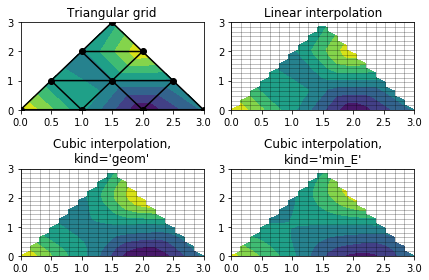

In [29]:
#Triinterp Demo

#Interpolation from triangular grid to quad grid.

import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import numpy as np

# Create triangulation.
x = np.asarray([0, 1, 2, 3, 0.5, 1.5, 2.5, 1, 2, 1.5])
y = np.asarray([0, 0, 0, 0, 1.0, 1.0, 1.0, 2, 2, 3.0])
triangles = [[0, 1, 4], [1, 2, 5], [2, 3, 6], [1, 5, 4], [2, 6, 5], [4, 5, 7],
             [5, 6, 8], [5, 8, 7], [7, 8, 9]]
triang = mtri.Triangulation(x, y, triangles)

# Interpolate to regularly-spaced quad grid.
z = np.cos(1.5 * x) * np.cos(1.5 * y)
xi, yi = np.meshgrid(np.linspace(0, 3, 20), np.linspace(0, 3, 20))

interp_lin = mtri.LinearTriInterpolator(triang, z)
zi_lin = interp_lin(xi, yi)

interp_cubic_geom = mtri.CubicTriInterpolator(triang, z, kind='geom')
zi_cubic_geom = interp_cubic_geom(xi, yi)

interp_cubic_min_E = mtri.CubicTriInterpolator(triang, z, kind='min_E')
zi_cubic_min_E = interp_cubic_min_E(xi, yi)


# Plot the triangulation.
plt.subplot(221)
plt.tricontourf(triang, z)
plt.triplot(triang, 'ko-')
plt.title('Triangular grid')

# Plot linear interpolation to quad grid.
plt.subplot(222)
plt.contourf(xi, yi, zi_lin)
plt.plot(xi, yi, 'k-', lw=0.5, alpha=0.5)
plt.plot(xi.T, yi.T, 'k-', lw=0.5, alpha=0.5)
plt.title("Linear interpolation")

# Plot cubic interpolation to quad grid, kind=geom
plt.subplot(223)
plt.contourf(xi, yi, zi_cubic_geom)
plt.plot(xi, yi, 'k-', lw=0.5, alpha=0.5)
plt.plot(xi.T, yi.T, 'k-', lw=0.5, alpha=0.5)
plt.title("Cubic interpolation,\nkind='geom'")

# Plot cubic interpolation to quad grid, kind=min_E
plt.subplot(224)
plt.contourf(xi, yi, zi_cubic_min_E)
plt.plot(xi, yi, 'k-', lw=0.5, alpha=0.5)
plt.plot(xi.T, yi.T, 'k-', lw=0.5, alpha=0.5)
plt.title("Cubic interpolation,\nkind='min_E'")

plt.tight_layout()
plt.show()

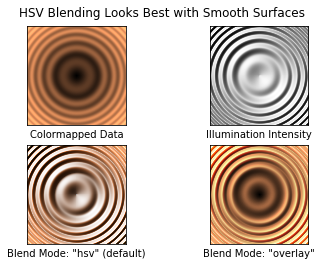

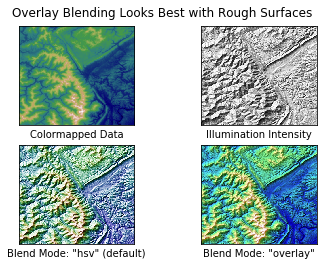

In [30]:
#Shading Example

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource
from matplotlib.cbook import get_sample_data

# Example showing how to make shaded relief plots
# like Mathematica
# (http://reference.wolfram.com/mathematica/ref/ReliefPlot.html)
# or Generic Mapping Tools
# (http://gmt.soest.hawaii.edu/gmt/doc/gmt/html/GMT_Docs/node145.html)


def main():
    # Test data
    x, y = np.mgrid[-5:5:0.05, -5:5:0.05]
    z = 5 * (np.sqrt(x**2 + y**2) + np.sin(x**2 + y**2))

    filename = get_sample_data('jacksboro_fault_dem.npz', asfileobj=False)
    with np.load(filename) as dem:
        elev = dem['elevation']

    fig = compare(z, plt.cm.copper)
    fig.suptitle('HSV Blending Looks Best with Smooth Surfaces', y=0.95)

    fig = compare(elev, plt.cm.gist_earth, ve=0.05)
    fig.suptitle('Overlay Blending Looks Best with Rough Surfaces', y=0.95)

    plt.show()


def compare(z, cmap, ve=1):
    # Create subplots and hide ticks
    fig, axes = plt.subplots(ncols=2, nrows=2)
    for ax in axes.flat:
        ax.set(xticks=[], yticks=[])

    # Illuminate the scene from the northwest
    ls = LightSource(azdeg=315, altdeg=45)

    axes[0, 0].imshow(z, cmap=cmap)
    axes[0, 0].set(xlabel='Colormapped Data')

    axes[0, 1].imshow(ls.hillshade(z, vert_exag=ve), cmap='gray')
    axes[0, 1].set(xlabel='Illumination Intensity')

    rgb = ls.shade(z, cmap=cmap, vert_exag=ve, blend_mode='hsv')
    axes[1, 0].imshow(rgb)
    axes[1, 0].set(xlabel='Blend Mode: "hsv" (default)')

    rgb = ls.shade(z, cmap=cmap, vert_exag=ve, blend_mode='overlay')
    axes[1, 1].imshow(rgb)
    axes[1, 1].set(xlabel='Blend Mode: "overlay"')

    return fig


if __name__ == '__main__':
    main()

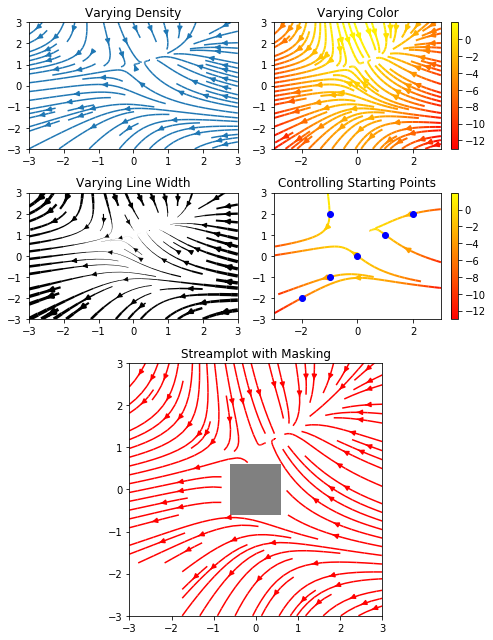

In [31]:
#Streamplot

#A stream plot, or streamline plot, is used to display 2D vector fields. This example shows a few features of the streamplot function:

#Varying the color along a streamline.
#Varying the density of streamlines.
#Varying the line width along a streamline.
#Controlling the starting points of streamlines.
#Streamlines skipping masked regions and NaN values.

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

w = 3
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U*U + V*V)

fig = plt.figure(figsize=(7, 9))
gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

#  Varying density along a streamline
ax0 = fig.add_subplot(gs[0, 0])
ax0.streamplot(X, Y, U, V, density=[0.5, 1])
ax0.set_title('Varying Density')

# Varying color along a streamline
ax1 = fig.add_subplot(gs[0, 1])
strm = ax1.streamplot(X, Y, U, V, color=U, linewidth=2, cmap='autumn')
fig.colorbar(strm.lines)
ax1.set_title('Varying Color')

#  Varying line width along a streamline
ax2 = fig.add_subplot(gs[1, 0])
lw = 5*speed / speed.max()
ax2.streamplot(X, Y, U, V, density=0.6, color='k', linewidth=lw)
ax2.set_title('Varying Line Width')

# Controlling the starting points of the streamlines
seed_points = np.array([[-2, -1, 0, 1, 2, -1], [-2, -1,  0, 1, 2, 2]])

ax3 = fig.add_subplot(gs[1, 1])
strm = ax3.streamplot(X, Y, U, V, color=U, linewidth=2,
                     cmap='autumn', start_points=seed_points.T)
fig.colorbar(strm.lines)
ax3.set_title('Controlling Starting Points')

# Displaying the starting points with blue symbols.
ax3.plot(seed_points[0], seed_points[1], 'bo')
ax3.axis((-w, w, -w, w))

# Create a mask
mask = np.zeros(U.shape, dtype=bool)
mask[40:60, 40:60] = True
U[:20, :20] = np.nan
U = np.ma.array(U, mask=mask)

ax4 = fig.add_subplot(gs[2:, :])
ax4.streamplot(X, Y, U, V, color='r')
ax4.set_title('Streamplot with Masking')

ax4.imshow(~mask, extent=(-w, w, -w, w), alpha=0.5,
          interpolation='nearest', cmap='gray', aspect='auto')
ax4.set_aspect('equal')

plt.tight_layout()
plt.show()

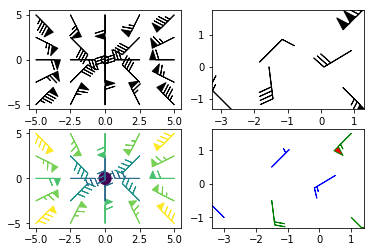

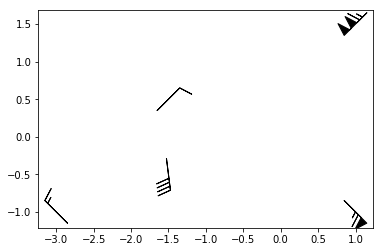

In [32]:
#Barb Demo

#Demonstration of wind barb plots


import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5, 5)
X, Y = np.meshgrid(x, x)
U, V = 12 * X, 12 * Y

data = [(-1.5, .5, -6, -6),
        (1, -1, -46, 46),
        (-3, -1, 11, -11),
        (1, 1.5, 80, 80),
        (0.5, 0.25, 25, 15),
        (-1.5, -0.5, -5, 40)]

data = np.array(data, dtype=[('x', np.float32), ('y', np.float32),
                             ('u', np.float32), ('v', np.float32)])

# Default parameters, uniform grid
ax = plt.subplot(2, 2, 1)
ax.barbs(X, Y, U, V)

# Arbitrary set of vectors, make them longer and change the pivot point
# (point around which they're rotated) to be the middle
ax = plt.subplot(2, 2, 2)
ax.barbs(data['x'], data['y'], data['u'], data['v'], length=8, pivot='middle')

# Showing colormapping with uniform grid.  Fill the circle for an empty barb,
# don't round the values, and change some of the size parameters
ax = plt.subplot(2, 2, 3)
ax.barbs(X, Y, U, V, np.sqrt(U * U + V * V), fill_empty=True, rounding=False,
         sizes=dict(emptybarb=0.25, spacing=0.2, height=0.3))

# Change colors as well as the increments for parts of the barbs
ax = plt.subplot(2, 2, 4)
ax.barbs(data['x'], data['y'], data['u'], data['v'], flagcolor='r',
         barbcolor=['b', 'g'],
         barb_increments=dict(half=10, full=20, flag=100), flip_barb=True)

# Masked arrays are also supported
masked_u = np.ma.masked_array(data['u'])
masked_u[4] = 1000  # Bad value that should not be plotted when masked
masked_u[4] = np.ma.masked

# Identical plot to panel 2 in the first figure, but with the point at
# (0.5, 0.25) missing (masked)
fig2 = plt.figure()
ax = fig2.add_subplot(1, 1, 1)
ax.barbs(data['x'], data['y'], masked_u, data['v'], length=8, pivot='middle')

plt.show()

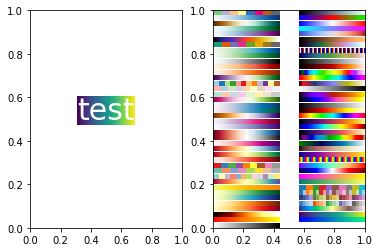

In [33]:
#Demo BboxImage

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import BboxImage
from matplotlib.transforms import Bbox, TransformedBbox

if __name__ == "__main__":

    fig = plt.figure(1)
    ax = plt.subplot(121)

    txt = ax.text(0.5, 0.5, "test", size=30, ha="center", color="w")
    kwargs = dict()

    bbox_image = BboxImage(txt.get_window_extent,
                           norm=None,
                           origin=None,
                           clip_on=False,
                           **kwargs
                           )
    a = np.arange(256).reshape(1, 256)/256.
    bbox_image.set_data(a)
    ax.add_artist(bbox_image)

    ax = plt.subplot(122)
    a = np.linspace(0, 1, 256).reshape(1, -1)
    a = np.vstack((a, a))

    maps = sorted(
        m for m in plt.cm.cmap_d
        if not m.endswith("_r") and  # Skip reversed colormaps.
        not m.startswith(('spectral', 'Vega'))  # Skip deprecated colormaps.
    )

    # fig.subplots_adjust(top=0.99, bottom=0.01, left=0.2, right=0.99)

    ncol = 2
    nrow = len(maps)//ncol + 1

    xpad_fraction = 0.3
    dx = 1./(ncol + xpad_fraction*(ncol - 1))

    ypad_fraction = 0.3
    dy = 1./(nrow + ypad_fraction*(nrow - 1))

    for i, m in enumerate(maps):
        ix, iy = divmod(i, nrow)
        # plt.figimage(a, 10, i*10, cmap=plt.get_cmap(m), origin='lower')
        bbox0 = Bbox.from_bounds(ix*dx*(1 + xpad_fraction),
                                 1. - iy*dy*(1 + ypad_fraction) - dy,
                                 dx, dy)
        bbox = TransformedBbox(bbox0, ax.transAxes)

        bbox_image = BboxImage(bbox,
                               cmap=plt.get_cmap(m),
                               norm=None,
                               origin=None,
                               **kwargs
                               )

        bbox_image.set_data(a)
        ax.add_artist(bbox_image)

    plt.draw()
    plt.show()

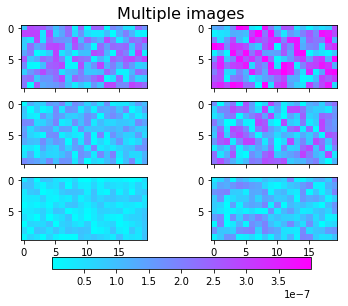

In [34]:
#Multi Image

#Make a set of images with a single colormap, norm, and colorbar.

#It also illustrates colorbar tick labelling with a multiplier.

from matplotlib.pyplot import figure, show, axes, sci
from matplotlib import cm, colors
from matplotlib.font_manager import FontProperties
import numpy as np

Nr = 3
Nc = 2

fig = figure()
cmap = cm.cool

figtitle = 'Multiple images'
t = fig.text(0.5, 0.95, figtitle,
             horizontalalignment='center',
             fontproperties=FontProperties(size=16))

cax = fig.add_axes([0.2, 0.08, 0.6, 0.04])

w = 0.4
h = 0.22
ax = []
images = []
vmin = 1e40
vmax = -1e40
for i in range(Nr):
    for j in range(Nc):
        pos = [0.075 + j * 1.1 * w, 0.18 + i * 1.2 * h, w, h]
        a = fig.add_axes(pos)
        if i > 0:
            a.set_xticklabels([])
        # Make some fake data with a range that varies
        # somewhat from one plot to the next.
        data = ((1 + i + j) / 10) * np.random.rand(10, 20) * 1e-6
        dd = data.ravel()
        # Manually find the min and max of all colors for
        # use in setting the color scale.
        vmin = min(vmin, np.min(dd))
        vmax = max(vmax, np.max(dd))
        images.append(a.imshow(data, cmap=cmap))

        ax.append(a)

# Set the first image as the master, with all the others
# observing it for changes in cmap or norm.


class ImageFollower(object):
    'update image in response to changes in clim or cmap on another image'

    def __init__(self, follower):
        self.follower = follower

    def __call__(self, leader):
        self.follower.set_cmap(leader.get_cmap())
        self.follower.set_clim(leader.get_clim())


norm = colors.Normalize(vmin=vmin, vmax=vmax)
for i, im in enumerate(images):
    im.set_norm(norm)
    if i > 0:
        images[0].callbacksSM.connect('changed', ImageFollower(im))

# The colorbar is also based on this master image.
fig.colorbar(images[0], cax, orientation='horizontal')

# We need the following only if we want to run this interactively and
# modify the colormap:

axes(ax[0])     # Return the current axes to the first one,
sci(images[0])  # because the current image must be in current axes.

show()

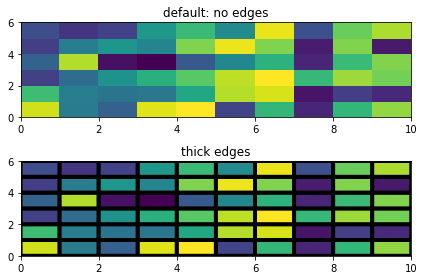

In [36]:
#Pcolor Demo

#Generating images with pcolor.

#Pcolor allows you to generate 2-D image-style plots. Below we will show how to do so in Matplotlib.

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from matplotlib.mlab import bivariate_normal
#A simple pcolor demo
Z = np.random.rand(6, 10)

fig, (ax0, ax1) = plt.subplots(2, 1)

c = ax0.pcolor(Z)
ax0.set_title('default: no edges')

c = ax1.pcolor(Z, edgecolors='k', linewidths=4)
ax1.set_title('thick edges')

fig.tight_layout()
plt.show()

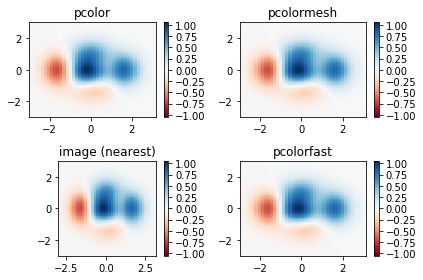

In [37]:
#Comparing pcolor with similar functions

#Demonstrates similarities between pcolor, pcolormesh, imshow and pcolorfast for drawing quadrilateral grids.

# make these smaller to increase the resolution
dx, dy = 0.15, 0.05

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[slice(-3, 3 + dy, dy),
                slice(-3, 3 + dx, dx)]
z = (1 - x / 2. + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()

fig, axs = plt.subplots(2, 2)

ax = axs[0, 0]
c = ax.pcolor(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('pcolor')
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

ax = axs[0, 1]
c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('pcolormesh')
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

ax = axs[1, 0]
c = ax.imshow(z, cmap='RdBu', vmin=z_min, vmax=z_max,
              extent=[x.min(), x.max(), y.min(), y.max()],
              interpolation='nearest', origin='lower')
ax.set_title('image (nearest)')
fig.colorbar(c, ax=ax)

ax = axs[1, 1]
c = ax.pcolorfast(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('pcolorfast')
fig.colorbar(c, ax=ax)

fig.tight_layout()
plt.show()

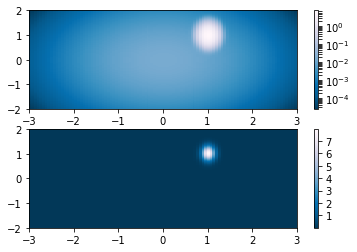

In [38]:
#Pcolor with a log scale
#The following shows pcolor plots with a log scale.

N = 100
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]

# A low hump with a spike coming out of the top right.
# Needs to have z/colour axis on a log scale so we see both hump and spike.
# linear scale only shows the spike.
Z1 = (bivariate_normal(X, Y, 0.1, 0.2, 1.0, 1.0) +
      0.1 * bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0))

fig, (ax0, ax1) = plt.subplots(2, 1)

c = ax0.pcolor(X, Y, Z1,
               norm=LogNorm(vmin=Z1.min(), vmax=Z1.max()), cmap='PuBu_r')
fig.colorbar(c, ax=ax0)

c = ax1.pcolor(X, Y, Z1, cmap='PuBu_r')
fig.colorbar(c, ax=ax1)

plt.show()

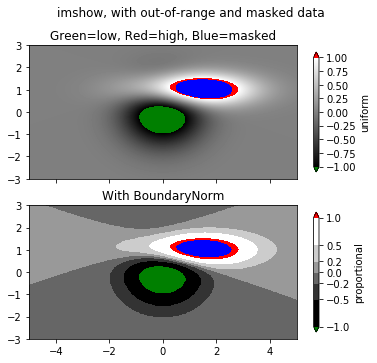

In [39]:
#Image Masked

#imshow with masked array input and out-of-range colors.

#The second subplot illustrates the use of BoundaryNorm to get a filled contour effect.

from copy import copy

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.mlab as mlab

# compute some interesting data
x0, x1 = -5, 5
y0, y1 = -3, 3
x = np.linspace(x0, x1, 500)
y = np.linspace(y0, y1, 500)
X, Y = np.meshgrid(x, y)
Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
Z = 10*(Z2 - Z1)  # difference of Gaussians

# Set up a colormap:
# use copy so that we do not mutate the global colormap instance
palette = copy(plt.cm.gray)
palette.set_over('r', 1.0)
palette.set_under('g', 1.0)
palette.set_bad('b', 1.0)
# Alternatively, we could use
# palette.set_bad(alpha = 0.0)
# to make the bad region transparent.  This is the default.
# If you comment out all the palette.set* lines, you will see
# all the defaults; under and over will be colored with the
# first and last colors in the palette, respectively.
Zm = np.ma.masked_where(Z > 1.2, Z)

# By setting vmin and vmax in the norm, we establish the
# range to which the regular palette color scale is applied.
# Anything above that range is colored based on palette.set_over, etc.

# set up the axes
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(6, 5.4))

# plot using 'continuous' color map
im = ax1.imshow(Zm, interpolation='bilinear',
                cmap=palette,
                norm=colors.Normalize(vmin=-1.0, vmax=1.0),
                aspect='auto',
                origin='lower',
                extent=[x0, x1, y0, y1])
ax1.set_title('Green=low, Red=high, Blue=masked')
cbar = fig.colorbar(im, extend='both', shrink=0.9, ax=ax1)
cbar.set_label('uniform')
for ticklabel in ax1.xaxis.get_ticklabels():
    ticklabel.set_visible(False)

# Plot using a small number of colors, with unevenly spaced boundaries.
im = ax2.imshow(Zm, interpolation='nearest',
                cmap=palette,
                norm=colors.BoundaryNorm([-1, -0.5, -0.2, 0, 0.2, 0.5, 1],
                                         ncolors=palette.N),
                aspect='auto',
                origin='lower',
                extent=[x0, x1, y0, y1])
ax2.set_title('With BoundaryNorm')
cbar = fig.colorbar(im, extend='both', spacing='proportional',
                    shrink=0.9, ax=ax2)
cbar.set_label('proportional')

fig.suptitle('imshow, with out-of-range and masked data')
plt.show()

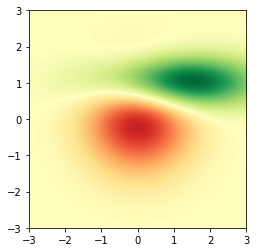

In [40]:
#Image Demo

#Many ways to plot images in Matplotlib.

#The most common way to plot images in Matplotlib is with imshow. The following examples demonstrate much of the functionality of imshow and the many images you can create.

from __future__ import print_function

import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.path import Path
from matplotlib.patches import PathPatch
#First we’ll generate a simple bivariate normal distribution.

delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
Z = Z2 - Z1  # difference of Gaussians

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.RdYlGn,
                origin='lower', extent=[-3, 3, -3, 3],
                vmax=abs(Z).max(), vmin=-abs(Z).max())

plt.show()

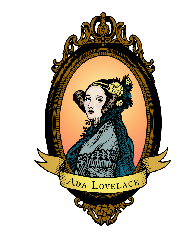

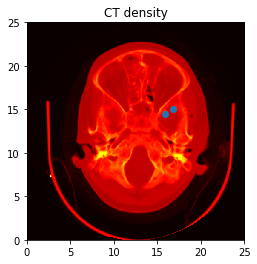

In [41]:
#It is also possible to show images of pictures.

# A sample image
with cbook.get_sample_data('ada.png') as image_file:
    image = plt.imread(image_file)

fig, ax = plt.subplots()
ax.imshow(image)
ax.axis('off')  # clear x- and y-axes


# And another image

w, h = 512, 512

with cbook.get_sample_data('ct.raw.gz', asfileobj=True) as datafile:
    s = datafile.read()
A = np.fromstring(s, np.uint16).astype(float).reshape((w, h))
A /= A.max()

fig, ax = plt.subplots()
extent = (0, 25, 0, 25)
im = ax.imshow(A, cmap=plt.cm.hot, origin='upper', extent=extent)

markers = [(15.9, 14.5), (16.8, 15)]
x, y = zip(*markers)
ax.plot(x, y, 'o')

ax.set_title('CT density')

plt.show()

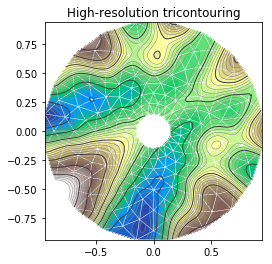

In [42]:
#Tricontour Smooth User

#Demonstrates high-resolution tricontouring on user-defined triangular grids with matplotlib.tri.UniformTriRefiner

import matplotlib.tri as tri
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


#-----------------------------------------------------------------------------
# Analytical test function
#-----------------------------------------------------------------------------
def function_z(x, y):
    """ A function of 2 variables """
    r1 = np.sqrt((0.5 - x)**2 + (0.5 - y)**2)
    theta1 = np.arctan2(0.5 - x, 0.5 - y)
    r2 = np.sqrt((-x - 0.2)**2 + (-y - 0.2)**2)
    theta2 = np.arctan2(-x - 0.2, -y - 0.2)
    z = -(2 * (np.exp((r1 / 10)**2) - 1) * 30. * np.cos(7. * theta1) +
          (np.exp((r2 / 10)**2) - 1) * 30. * np.cos(11. * theta2) +
          0.7 * (x**2 + y**2))
    return (np.max(z) - z) / (np.max(z) - np.min(z))

#-----------------------------------------------------------------------------
# Creating a Triangulation
#-----------------------------------------------------------------------------
# First create the x and y coordinates of the points.
n_angles = 20
n_radii = 10
min_radius = 0.15
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2 * np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi / n_angles

x = (radii * np.cos(angles)).flatten()
y = (radii * np.sin(angles)).flatten()
z = function_z(x, y)

# Now create the Triangulation.
# (Creating a Triangulation without specifying the triangles results in the
# Delaunay triangulation of the points.)
triang = tri.Triangulation(x, y)

# Mask off unwanted triangles.
triang.set_mask(np.hypot(x[triang.triangles].mean(axis=1),
                         y[triang.triangles].mean(axis=1))
                < min_radius)

#-----------------------------------------------------------------------------
# Refine data
#-----------------------------------------------------------------------------
refiner = tri.UniformTriRefiner(triang)
tri_refi, z_test_refi = refiner.refine_field(z, subdiv=3)

#-----------------------------------------------------------------------------
# Plot the triangulation and the high-res iso-contours
#-----------------------------------------------------------------------------
plt.figure()
plt.gca().set_aspect('equal')
plt.triplot(triang, lw=0.5, color='white')

levels = np.arange(0., 1., 0.025)
cmap = cm.get_cmap(name='terrain', lut=None)
plt.tricontourf(tri_refi, z_test_refi, levels=levels, cmap=cmap)
plt.tricontour(tri_refi, z_test_refi, levels=levels,
               colors=['0.25', '0.5', '0.5', '0.5', '0.5'],
               linewidths=[1.0, 0.5, 0.5, 0.5, 0.5])

plt.title("High-resolution tricontouring")

plt.show()

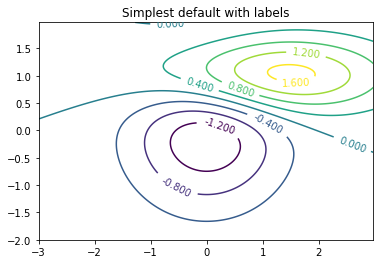

In [43]:
#Contour Demo

#Illustrate simple contour plotting, contours on an image with a colorbar for the contours, and labelled contours.

#See also contour_image.py.

import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
# difference of Gaussians
Z = 10.0 * (Z2 - Z1)
#Create a simple contour plot with labels using default colors. The inline argument to clabel will control whether the labels are draw over the line segments of the contour, removing the lines beneath the label

plt.figure()
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Simplest default with labels')

plt.show()

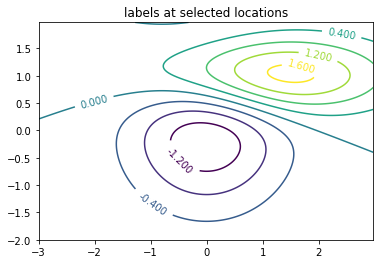

In [44]:
#contour labels can be placed manually by providing list of positions (in data coordinate). See ginput_manual_clabel.py for interactive placement.

plt.figure()
CS = plt.contour(X, Y, Z)
manual_locations = [(-1, -1.4), (-0.62, -0.7), (-2, 0.5), (1.7, 1.2), (2.0, 1.4), (2.4, 1.7)]
plt.clabel(CS, inline=1, fontsize=10, manual=manual_locations)
plt.title('labels at selected locations')

plt.show()

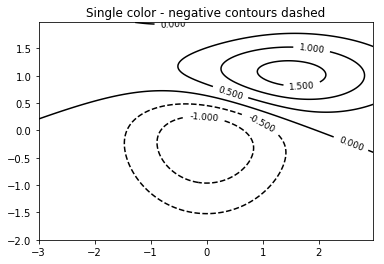

In [45]:
#You can force all the contours to be the same color.

plt.figure()
CS = plt.contour(X, Y, Z, 6,
                 colors='k',  # negative contours will be dashed by default
                 )
plt.clabel(CS, fontsize=9, inline=1)
plt.title('Single color - negative contours dashed')

plt.show()

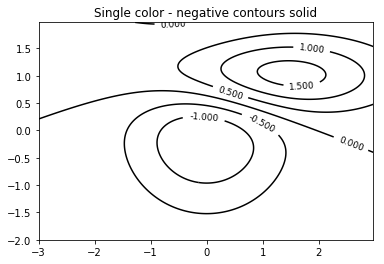

In [46]:
#You can set negative contours to be solid instead of dashed:

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
plt.figure()
CS = plt.contour(X, Y, Z, 6,
                 colors='k',  # negative contours will be dashed by default
                 )
plt.clabel(CS, fontsize=9, inline=1)
plt.title('Single color - negative contours solid')

plt.show()

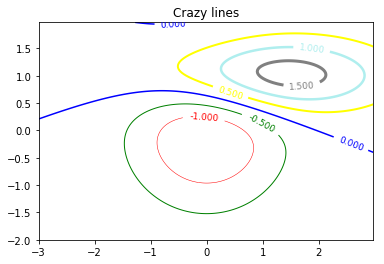

In [47]:
#And you can manually specify the colors of the contour

plt.figure()
CS = plt.contour(X, Y, Z, 6,
                 linewidths=np.arange(.5, 4, .5),
                 colors=('r', 'green', 'blue', (1, 1, 0), '#afeeee', '0.5')
                 )
plt.clabel(CS, fontsize=9, inline=1)
plt.title('Crazy lines')

plt.show()

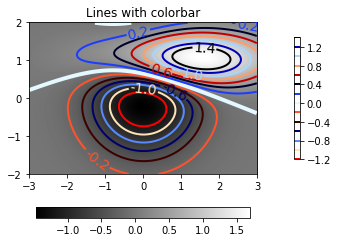

In [48]:
#Or you can use a colormap to specify the colors; the default colormap will be used for the contour lines

plt.figure()
im = plt.imshow(Z, interpolation='bilinear', origin='lower',
                cmap=cm.gray, extent=(-3, 3, -2, 2))
levels = np.arange(-1.2, 1.6, 0.2)
CS = plt.contour(Z, levels,
                 origin='lower',
                 linewidths=2,
                 extent=(-3, 3, -2, 2))

# Thicken the zero contour.
zc = CS.collections[6]
plt.setp(zc, linewidth=4)

plt.clabel(CS, levels[1::2],  # label every second level
           inline=1,
           fmt='%1.1f',
           fontsize=14)

# make a colorbar for the contour lines
CB = plt.colorbar(CS, shrink=0.8, extend='both')

plt.title('Lines with colorbar')
#plt.hot()  # Now change the colormap for the contour lines and colorbar
plt.flag()

# We can still add a colorbar for the image, too.
CBI = plt.colorbar(im, orientation='horizontal', shrink=0.8)

# This makes the original colorbar look a bit out of place,
# so let's improve its position.

l, b, w, h = plt.gca().get_position().bounds
ll, bb, ww, hh = CB.ax.get_position().bounds
CB.ax.set_position([ll, b + 0.1*h, ww, h*0.8])


plt.show()

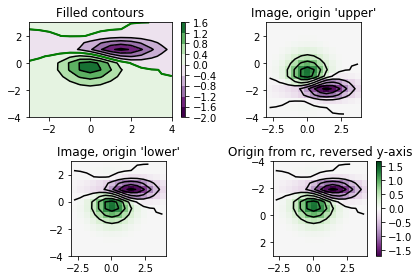

In [49]:
#Contour Image

#Test combinations of contouring, filled contouring, and image plotting. For contour labelling, see contour_demo.py.

#The emphasis in this demo is on showing how to make contours register correctly on images, and on how to get both of them oriented as desired. In particular, note the usage of the “origin” and “extent” keyword arguments to imshow and contour.

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import mlab, cm

# Default delta is large because that makes it fast, and it illustrates
# the correct registration between image and contours.
delta = 0.5

extent = (-3, 4, -4, 3)

x = np.arange(-3.0, 4.001, delta)
y = np.arange(-4.0, 3.001, delta)
X, Y = np.meshgrid(x, y)
Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
Z = (Z1 - Z2) * 10

# Boost the upper limit to avoid truncation errors.
levels = np.arange(-2.0, 1.601, 0.4)

norm = cm.colors.Normalize(vmax=abs(Z).max(), vmin=-abs(Z).max())
cmap = cm.PRGn

fig = plt.figure()
fig.subplots_adjust(hspace=0.3)


plt.subplot(2, 2, 1)

cset1 = plt.contourf(X, Y, Z, levels,
                     cmap=cm.get_cmap(cmap, len(levels) - 1), norm=norm)
# It is not necessary, but for the colormap, we need only the
# number of levels minus 1.  To avoid discretization error, use
# either this number or a large number such as the default (256).

# If we want lines as well as filled regions, we need to call
# contour separately; don't try to change the edgecolor or edgewidth
# of the polygons in the collections returned by contourf.
# Use levels output from previous call to guarantee they are the same.

cset2 = plt.contour(X, Y, Z, cset1.levels, colors='k')

# We don't really need dashed contour lines to indicate negative
# regions, so let's turn them off.

for c in cset2.collections:
    c.set_linestyle('solid')

# It is easier here to make a separate call to contour than
# to set up an array of colors and linewidths.
# We are making a thick green line as a zero contour.
# Specify the zero level as a tuple with only 0 in it.

cset3 = plt.contour(X, Y, Z, (0,), colors='g', linewidths=2)
plt.title('Filled contours')
plt.colorbar(cset1)


plt.subplot(2, 2, 2)

plt.imshow(Z, extent=extent, cmap=cmap, norm=norm)
v = plt.axis()
plt.contour(Z, levels, colors='k', origin='upper', extent=extent)
plt.axis(v)
plt.title("Image, origin 'upper'")

plt.subplot(2, 2, 3)

plt.imshow(Z, origin='lower', extent=extent, cmap=cmap, norm=norm)
v = plt.axis()
plt.contour(Z, levels, colors='k', origin='lower', extent=extent)
plt.axis(v)
plt.title("Image, origin 'lower'")

plt.subplot(2, 2, 4)

# We will use the interpolation "nearest" here to show the actual
# image pixels.
# Note that the contour lines don't extend to the edge of the box.
# This is intentional. The Z values are defined at the center of each
# image pixel (each color block on the following subplot), so the
# domain that is contoured does not extend beyond these pixel centers.
im = plt.imshow(Z, interpolation='nearest', extent=extent,
                cmap=cmap, norm=norm)
v = plt.axis()
plt.contour(Z, levels, colors='k', origin='image', extent=extent)
plt.axis(v)
ylim = plt.get(plt.gca(), 'ylim')
plt.setp(plt.gca(), ylim=ylim[::-1])
plt.title("Origin from rc, reversed y-axis")
plt.colorbar(im)

plt.tight_layout()
plt.show()

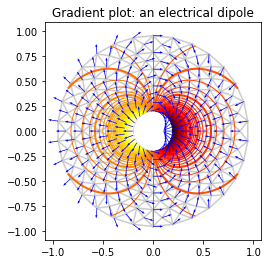

In [50]:
#Trigradient Demo

#Demonstrates computation of gradient with matplotlib.tri.CubicTriInterpolator.

from matplotlib.tri import (
    Triangulation, UniformTriRefiner, CubicTriInterpolator)
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


#-----------------------------------------------------------------------------
# Electrical potential of a dipole
#-----------------------------------------------------------------------------
def dipole_potential(x, y):
    """ The electric dipole potential V """
    r_sq = x**2 + y**2
    theta = np.arctan2(y, x)
    z = np.cos(theta)/r_sq
    return (np.max(z) - z) / (np.max(z) - np.min(z))


#-----------------------------------------------------------------------------
# Creating a Triangulation
#-----------------------------------------------------------------------------
# First create the x and y coordinates of the points.
n_angles = 30
n_radii = 10
min_radius = 0.2
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2 * np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi / n_angles

x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()
V = dipole_potential(x, y)

# Create the Triangulation; no triangles specified so Delaunay triangulation
# created.
triang = Triangulation(x, y)

# Mask off unwanted triangles.
triang.set_mask(np.hypot(x[triang.triangles].mean(axis=1),
                         y[triang.triangles].mean(axis=1))
                < min_radius)

#-----------------------------------------------------------------------------
# Refine data - interpolates the electrical potential V
#-----------------------------------------------------------------------------
refiner = UniformTriRefiner(triang)
tri_refi, z_test_refi = refiner.refine_field(V, subdiv=3)

#-----------------------------------------------------------------------------
# Computes the electrical field (Ex, Ey) as gradient of electrical potential
#-----------------------------------------------------------------------------
tci = CubicTriInterpolator(triang, -V)
# Gradient requested here at the mesh nodes but could be anywhere else:
(Ex, Ey) = tci.gradient(triang.x, triang.y)
E_norm = np.sqrt(Ex**2 + Ey**2)

#-----------------------------------------------------------------------------
# Plot the triangulation, the potential iso-contours and the vector field
#-----------------------------------------------------------------------------
fig, ax = plt.subplots()
ax.set_aspect('equal')
# Enforce the margins, and enlarge them to give room for the vectors.
ax.use_sticky_edges = False
ax.margins(0.07)

ax.triplot(triang, color='0.8')

levels = np.arange(0., 1., 0.01)
cmap = cm.get_cmap(name='hot', lut=None)
ax.tricontour(tri_refi, z_test_refi, levels=levels, cmap=cmap,
              linewidths=[2.0, 1.0, 1.0, 1.0])
# Plots direction of the electrical vector field
ax.quiver(triang.x, triang.y, Ex/E_norm, Ey/E_norm,
          units='xy', scale=10., zorder=3, color='blue',
          width=0.007, headwidth=3., headlength=4.)

ax.set_title('Gradient plot: an electrical dipole')
plt.show()

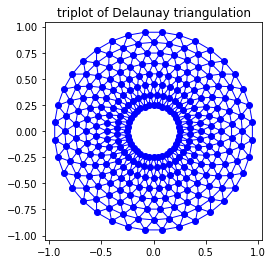

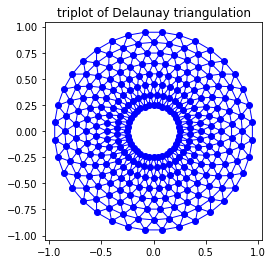

In [53]:
#Triplot Demo

#Creating and plotting unstructured triangular grids.

import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
#Creating a Triangulation without specifying the triangles results in the Delaunay triangulation of the points.

# First create the x and y coordinates of the points.
n_angles = 36
n_radii = 8
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2 * np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi / n_angles

x = (radii * np.cos(angles)).flatten()
y = (radii * np.sin(angles)).flatten()

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = tri.Triangulation(x, y)

# Mask off unwanted triangles.
triang.set_mask(np.hypot(x[triang.triangles].mean(axis=1),
                         y[triang.triangles].mean(axis=1))
                < min_radius)
#Plot the triangulation.

plt.figure()
plt.gca().set_aspect('equal')
plt.triplot(triang, 'bo-', lw=1)
plt.title('triplot of Delaunay triangulation')

plt.show()

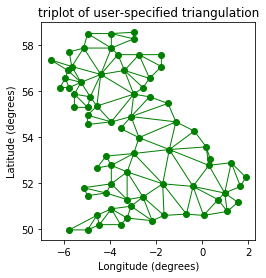

In [54]:
#You can specify your own triangulation rather than perform a Delaunay triangulation of the points, 
#where each triangle is given by the indices of the three points that make up the triangle, 
#ordered in either a clockwise or anticlockwise manner.

xy = np.asarray([
    [-0.101, 0.872], [-0.080, 0.883], [-0.069, 0.888], [-0.054, 0.890],
    [-0.045, 0.897], [-0.057, 0.895], [-0.073, 0.900], [-0.087, 0.898],
    [-0.090, 0.904], [-0.069, 0.907], [-0.069, 0.921], [-0.080, 0.919],
    [-0.073, 0.928], [-0.052, 0.930], [-0.048, 0.942], [-0.062, 0.949],
    [-0.054, 0.958], [-0.069, 0.954], [-0.087, 0.952], [-0.087, 0.959],
    [-0.080, 0.966], [-0.085, 0.973], [-0.087, 0.965], [-0.097, 0.965],
    [-0.097, 0.975], [-0.092, 0.984], [-0.101, 0.980], [-0.108, 0.980],
    [-0.104, 0.987], [-0.102, 0.993], [-0.115, 1.001], [-0.099, 0.996],
    [-0.101, 1.007], [-0.090, 1.010], [-0.087, 1.021], [-0.069, 1.021],
    [-0.052, 1.022], [-0.052, 1.017], [-0.069, 1.010], [-0.064, 1.005],
    [-0.048, 1.005], [-0.031, 1.005], [-0.031, 0.996], [-0.040, 0.987],
    [-0.045, 0.980], [-0.052, 0.975], [-0.040, 0.973], [-0.026, 0.968],
    [-0.020, 0.954], [-0.006, 0.947], [ 0.003, 0.935], [ 0.006, 0.926],
    [ 0.005, 0.921], [ 0.022, 0.923], [ 0.033, 0.912], [ 0.029, 0.905],
    [ 0.017, 0.900], [ 0.012, 0.895], [ 0.027, 0.893], [ 0.019, 0.886],
    [ 0.001, 0.883], [-0.012, 0.884], [-0.029, 0.883], [-0.038, 0.879],
    [-0.057, 0.881], [-0.062, 0.876], [-0.078, 0.876], [-0.087, 0.872],
    [-0.030, 0.907], [-0.007, 0.905], [-0.057, 0.916], [-0.025, 0.933],
    [-0.077, 0.990], [-0.059, 0.993]])
x = np.degrees(xy[:, 0])
y = np.degrees(xy[:, 1])

triangles = np.asarray([
    [67, 66,  1], [65,  2, 66], [ 1, 66,  2], [64,  2, 65], [63,  3, 64],
    [60, 59, 57], [ 2, 64,  3], [ 3, 63,  4], [ 0, 67,  1], [62,  4, 63],
    [57, 59, 56], [59, 58, 56], [61, 60, 69], [57, 69, 60], [ 4, 62, 68],
    [ 6,  5,  9], [61, 68, 62], [69, 68, 61], [ 9,  5, 70], [ 6,  8,  7],
    [ 4, 70,  5], [ 8,  6,  9], [56, 69, 57], [69, 56, 52], [70, 10,  9],
    [54, 53, 55], [56, 55, 53], [68, 70,  4], [52, 56, 53], [11, 10, 12],
    [69, 71, 68], [68, 13, 70], [10, 70, 13], [51, 50, 52], [13, 68, 71],
    [52, 71, 69], [12, 10, 13], [71, 52, 50], [71, 14, 13], [50, 49, 71],
    [49, 48, 71], [14, 16, 15], [14, 71, 48], [17, 19, 18], [17, 20, 19],
    [48, 16, 14], [48, 47, 16], [47, 46, 16], [16, 46, 45], [23, 22, 24],
    [21, 24, 22], [17, 16, 45], [20, 17, 45], [21, 25, 24], [27, 26, 28],
    [20, 72, 21], [25, 21, 72], [45, 72, 20], [25, 28, 26], [44, 73, 45],
    [72, 45, 73], [28, 25, 29], [29, 25, 31], [43, 73, 44], [73, 43, 40],
    [72, 73, 39], [72, 31, 25], [42, 40, 43], [31, 30, 29], [39, 73, 40],
    [42, 41, 40], [72, 33, 31], [32, 31, 33], [39, 38, 72], [33, 72, 38],
    [33, 38, 34], [37, 35, 38], [34, 38, 35], [35, 37, 36]])
#Rather than create a Triangulation object, can simply pass x, y and triangles arrays to triplot directly. 
#It would be better to use a Triangulation object if the same triangulation was to be used more than once to save duplicated calculations.

plt.figure()
plt.gca().set_aspect('equal')
plt.triplot(x, y, triangles, 'go-', lw=1.0)
plt.title('triplot of user-specified triangulation')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')

plt.show()

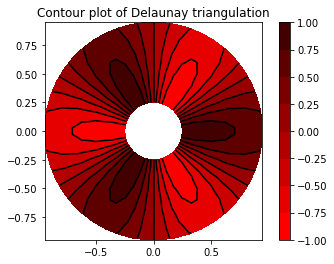

In [56]:
#Tricontour Demo

#Contour plots of unstructured triangular grids.

import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
#Creating a Triangulation without specifying the triangles results in the Delaunay triangulation of the points.

# First create the x and y coordinates of the points.
n_angles = 48
n_radii = 8
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2 * np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi / n_angles

x = (radii * np.cos(angles)).flatten()
y = (radii * np.sin(angles)).flatten()
z = (np.cos(radii) * np.cos(3 * angles)).flatten()

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = tri.Triangulation(x, y)

# Mask off unwanted triangles.
triang.set_mask(np.hypot(x[triang.triangles].mean(axis=1),
                         y[triang.triangles].mean(axis=1))
                < min_radius)

#pcolor plot.

plt.figure()
plt.gca().set_aspect('equal')
plt.tricontourf(triang, z)
plt.colorbar()
plt.tricontour(triang, z, colors='k')
plt.title('Contour plot of Delaunay triangulation')

plt.show()

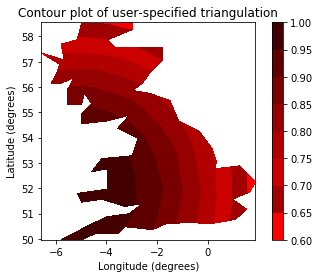

In [58]:
#You can specify your own triangulation rather than perform a Delaunay triangulation of the points, where each triangle is given by the indices of the three points that make up the triangle, ordered in either a clockwise or anticlockwise manner.

xy = np.asarray([
    [-0.101, 0.872], [-0.080, 0.883], [-0.069, 0.888], [-0.054, 0.890],
    [-0.045, 0.897], [-0.057, 0.895], [-0.073, 0.900], [-0.087, 0.898],
    [-0.090, 0.904], [-0.069, 0.907], [-0.069, 0.921], [-0.080, 0.919],
    [-0.073, 0.928], [-0.052, 0.930], [-0.048, 0.942], [-0.062, 0.949],
    [-0.054, 0.958], [-0.069, 0.954], [-0.087, 0.952], [-0.087, 0.959],
    [-0.080, 0.966], [-0.085, 0.973], [-0.087, 0.965], [-0.097, 0.965],
    [-0.097, 0.975], [-0.092, 0.984], [-0.101, 0.980], [-0.108, 0.980],
    [-0.104, 0.987], [-0.102, 0.993], [-0.115, 1.001], [-0.099, 0.996],
    [-0.101, 1.007], [-0.090, 1.010], [-0.087, 1.021], [-0.069, 1.021],
    [-0.052, 1.022], [-0.052, 1.017], [-0.069, 1.010], [-0.064, 1.005],
    [-0.048, 1.005], [-0.031, 1.005], [-0.031, 0.996], [-0.040, 0.987],
    [-0.045, 0.980], [-0.052, 0.975], [-0.040, 0.973], [-0.026, 0.968],
    [-0.020, 0.954], [-0.006, 0.947], [ 0.003, 0.935], [ 0.006, 0.926],
    [ 0.005, 0.921], [ 0.022, 0.923], [ 0.033, 0.912], [ 0.029, 0.905],
    [ 0.017, 0.900], [ 0.012, 0.895], [ 0.027, 0.893], [ 0.019, 0.886],
    [ 0.001, 0.883], [-0.012, 0.884], [-0.029, 0.883], [-0.038, 0.879],
    [-0.057, 0.881], [-0.062, 0.876], [-0.078, 0.876], [-0.087, 0.872],
    [-0.030, 0.907], [-0.007, 0.905], [-0.057, 0.916], [-0.025, 0.933],
    [-0.077, 0.990], [-0.059, 0.993]])
x = np.degrees(xy[:, 0])
y = np.degrees(xy[:, 1])
x0 = -5
y0 = 52
z = np.exp(-0.01 * ((x - x0) * (x - x0) + (y - y0) * (y - y0)))

triangles = np.asarray([
    [67, 66,  1], [65,  2, 66], [ 1, 66,  2], [64,  2, 65], [63,  3, 64],
    [60, 59, 57], [ 2, 64,  3], [ 3, 63,  4], [ 0, 67,  1], [62,  4, 63],
    [57, 59, 56], [59, 58, 56], [61, 60, 69], [57, 69, 60], [ 4, 62, 68],
    [ 6,  5,  9], [61, 68, 62], [69, 68, 61], [ 9,  5, 70], [ 6,  8,  7],
    [ 4, 70,  5], [ 8,  6,  9], [56, 69, 57], [69, 56, 52], [70, 10,  9],
    [54, 53, 55], [56, 55, 53], [68, 70,  4], [52, 56, 53], [11, 10, 12],
    [69, 71, 68], [68, 13, 70], [10, 70, 13], [51, 50, 52], [13, 68, 71],
    [52, 71, 69], [12, 10, 13], [71, 52, 50], [71, 14, 13], [50, 49, 71],
    [49, 48, 71], [14, 16, 15], [14, 71, 48], [17, 19, 18], [17, 20, 19],
    [48, 16, 14], [48, 47, 16], [47, 46, 16], [16, 46, 45], [23, 22, 24],
    [21, 24, 22], [17, 16, 45], [20, 17, 45], [21, 25, 24], [27, 26, 28],
    [20, 72, 21], [25, 21, 72], [45, 72, 20], [25, 28, 26], [44, 73, 45],
    [72, 45, 73], [28, 25, 29], [29, 25, 31], [43, 73, 44], [73, 43, 40],
    [72, 73, 39], [72, 31, 25], [42, 40, 43], [31, 30, 29], [39, 73, 40],
    [42, 41, 40], [72, 33, 31], [32, 31, 33], [39, 38, 72], [33, 72, 38],
    [33, 38, 34], [37, 35, 38], [34, 38, 35], [35, 37, 36]])
#Rather than create a Triangulation object, can simply pass x, y and triangles arrays to tripcolor directly. It would be better to use a Triangulation object if the same triangulation was to be used more than once to save duplicated calculations.

plt.figure()
plt.gca().set_aspect('equal')
plt.tricontourf(x, y, triangles, z)
plt.colorbar()
plt.title('Contour plot of user-specified triangulation')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')

plt.show()

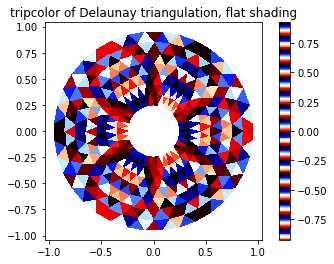

In [59]:
#Tripcolor Demo

#Pseudocolor plots of unstructured triangular grids.

import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
#Creating a Triangulation without specifying the triangles results in the Delaunay triangulation of the points.

# First create the x and y coordinates of the points.
n_angles = 36
n_radii = 8
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2 * np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi / n_angles

x = (radii * np.cos(angles)).flatten()
y = (radii * np.sin(angles)).flatten()
z = (np.cos(radii) * np.cos(3 * angles)).flatten()

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = tri.Triangulation(x, y)

# Mask off unwanted triangles.
triang.set_mask(np.hypot(x[triang.triangles].mean(axis=1),
                         y[triang.triangles].mean(axis=1))
                < min_radius)
#tripcolor plot.

plt.figure()
plt.gca().set_aspect('equal')
plt.tripcolor(triang, z, shading='flat')
plt.colorbar()
plt.title('tripcolor of Delaunay triangulation, flat shading')

plt.show()

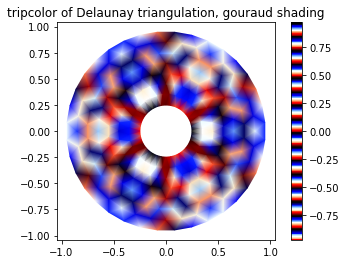

In [60]:
#Illustrate Gouraud shading.

plt.figure()
plt.gca().set_aspect('equal')
plt.tripcolor(triang, z, shading='gouraud')
plt.colorbar()
plt.title('tripcolor of Delaunay triangulation, gouraud shading')

plt.show()

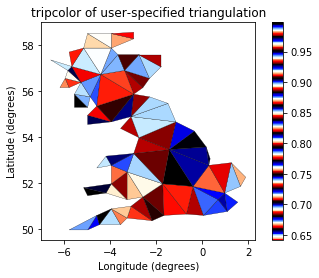

In [61]:
#You can specify your own triangulation rather than perform a Delaunay triangulation of the points, where each triangle is given by the indices of the three points that make up the triangle, ordered in either a clockwise or anticlockwise manner.

xy = np.asarray([
    [-0.101, 0.872], [-0.080, 0.883], [-0.069, 0.888], [-0.054, 0.890],
    [-0.045, 0.897], [-0.057, 0.895], [-0.073, 0.900], [-0.087, 0.898],
    [-0.090, 0.904], [-0.069, 0.907], [-0.069, 0.921], [-0.080, 0.919],
    [-0.073, 0.928], [-0.052, 0.930], [-0.048, 0.942], [-0.062, 0.949],
    [-0.054, 0.958], [-0.069, 0.954], [-0.087, 0.952], [-0.087, 0.959],
    [-0.080, 0.966], [-0.085, 0.973], [-0.087, 0.965], [-0.097, 0.965],
    [-0.097, 0.975], [-0.092, 0.984], [-0.101, 0.980], [-0.108, 0.980],
    [-0.104, 0.987], [-0.102, 0.993], [-0.115, 1.001], [-0.099, 0.996],
    [-0.101, 1.007], [-0.090, 1.010], [-0.087, 1.021], [-0.069, 1.021],
    [-0.052, 1.022], [-0.052, 1.017], [-0.069, 1.010], [-0.064, 1.005],
    [-0.048, 1.005], [-0.031, 1.005], [-0.031, 0.996], [-0.040, 0.987],
    [-0.045, 0.980], [-0.052, 0.975], [-0.040, 0.973], [-0.026, 0.968],
    [-0.020, 0.954], [-0.006, 0.947], [ 0.003, 0.935], [ 0.006, 0.926],
    [ 0.005, 0.921], [ 0.022, 0.923], [ 0.033, 0.912], [ 0.029, 0.905],
    [ 0.017, 0.900], [ 0.012, 0.895], [ 0.027, 0.893], [ 0.019, 0.886],
    [ 0.001, 0.883], [-0.012, 0.884], [-0.029, 0.883], [-0.038, 0.879],
    [-0.057, 0.881], [-0.062, 0.876], [-0.078, 0.876], [-0.087, 0.872],
    [-0.030, 0.907], [-0.007, 0.905], [-0.057, 0.916], [-0.025, 0.933],
    [-0.077, 0.990], [-0.059, 0.993]])
x, y = np.rad2deg(xy).T

triangles = np.asarray([
    [67, 66,  1], [65,  2, 66], [ 1, 66,  2], [64,  2, 65], [63,  3, 64],
    [60, 59, 57], [ 2, 64,  3], [ 3, 63,  4], [ 0, 67,  1], [62,  4, 63],
    [57, 59, 56], [59, 58, 56], [61, 60, 69], [57, 69, 60], [ 4, 62, 68],
    [ 6,  5,  9], [61, 68, 62], [69, 68, 61], [ 9,  5, 70], [ 6,  8,  7],
    [ 4, 70,  5], [ 8,  6,  9], [56, 69, 57], [69, 56, 52], [70, 10,  9],
    [54, 53, 55], [56, 55, 53], [68, 70,  4], [52, 56, 53], [11, 10, 12],
    [69, 71, 68], [68, 13, 70], [10, 70, 13], [51, 50, 52], [13, 68, 71],
    [52, 71, 69], [12, 10, 13], [71, 52, 50], [71, 14, 13], [50, 49, 71],
    [49, 48, 71], [14, 16, 15], [14, 71, 48], [17, 19, 18], [17, 20, 19],
    [48, 16, 14], [48, 47, 16], [47, 46, 16], [16, 46, 45], [23, 22, 24],
    [21, 24, 22], [17, 16, 45], [20, 17, 45], [21, 25, 24], [27, 26, 28],
    [20, 72, 21], [25, 21, 72], [45, 72, 20], [25, 28, 26], [44, 73, 45],
    [72, 45, 73], [28, 25, 29], [29, 25, 31], [43, 73, 44], [73, 43, 40],
    [72, 73, 39], [72, 31, 25], [42, 40, 43], [31, 30, 29], [39, 73, 40],
    [42, 41, 40], [72, 33, 31], [32, 31, 33], [39, 38, 72], [33, 72, 38],
    [33, 38, 34], [37, 35, 38], [34, 38, 35], [35, 37, 36]])

xmid = x[triangles].mean(axis=1)
ymid = y[triangles].mean(axis=1)
x0 = -5
y0 = 52
zfaces = np.exp(-0.01 * ((xmid - x0) * (xmid - x0) +
                         (ymid - y0) * (ymid - y0)))

#Rather than create a Triangulation object, can simply pass x, y and triangles arrays to tripcolor directly. It would be better to use a Triangulation object if the same triangulation was to be used more than once to save duplicated calculations. Can specify one color value per face rather than one per point by using the facecolors kwarg.

plt.figure()
plt.gca().set_aspect('equal')
plt.tripcolor(x, y, triangles, facecolors=zfaces, edgecolors='k')
plt.colorbar()
plt.title('tripcolor of user-specified triangulation')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')

plt.show()

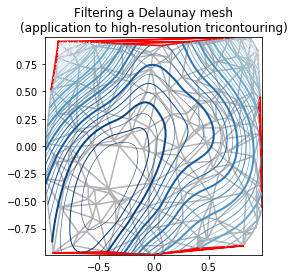

In [62]:
#Tricontour Smooth Delaunay

#Demonstrates high-resolution tricontouring of a random set of points ; a matplotlib.tri.TriAnalyzer is used to improve the plot quality.

#The initial data points and triangular grid for this demo are:

#a set of random points is instantiated, inside [-1, 1] x [-1, 1] square
#A Delaunay triangulation of these points is then computed, of which a random subset of triangles is masked out by the user (based on init_mask_frac parameter). This simulates invalidated data.
#The proposed generic procedure to obtain a high resolution contouring of such a data set is the following:

#Compute an extended mask with a matplotlib.tri.TriAnalyzer, which will exclude badly shaped (flat) triangles from the border of the triangulation. Apply the mask to the triangulation (using set_mask).
#Refine and interpolate the data using a matplotlib.tri.UniformTriRefiner.
#Plot the refined data with tricontour.

from matplotlib.tri import Triangulation, TriAnalyzer, UniformTriRefiner
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


#-----------------------------------------------------------------------------
# Analytical test function
#-----------------------------------------------------------------------------
def experiment_res(x, y):
    """ An analytic function representing experiment results """
    x = 2. * x
    r1 = np.sqrt((0.5 - x)**2 + (0.5 - y)**2)
    theta1 = np.arctan2(0.5 - x, 0.5 - y)
    r2 = np.sqrt((-x - 0.2)**2 + (-y - 0.2)**2)
    theta2 = np.arctan2(-x - 0.2, -y - 0.2)
    z = (4 * (np.exp((r1 / 10)**2) - 1) * 30. * np.cos(3 * theta1) +
         (np.exp((r2 / 10)**2) - 1) * 30. * np.cos(5 * theta2) +
         2 * (x**2 + y**2))
    return (np.max(z) - z) / (np.max(z) - np.min(z))

#-----------------------------------------------------------------------------
# Generating the initial data test points and triangulation for the demo
#-----------------------------------------------------------------------------
# User parameters for data test points
n_test = 200  # Number of test data points, tested from 3 to 5000 for subdiv=3

subdiv = 3  # Number of recursive subdivisions of the initial mesh for smooth
            # plots. Values >3 might result in a very high number of triangles
            # for the refine mesh: new triangles numbering = (4**subdiv)*ntri

init_mask_frac = 0.0    # Float > 0. adjusting the proportion of
                        # (invalid) initial triangles which will be masked
                        # out. Enter 0 for no mask.

min_circle_ratio = .01  # Minimum circle ratio - border triangles with circle
                        # ratio below this will be masked if they touch a
                        # border. Suggested value 0.01 ; Use -1 to keep
                        # all triangles.

# Random points
random_gen = np.random.RandomState(seed=19680801)
x_test = random_gen.uniform(-1., 1., size=n_test)
y_test = random_gen.uniform(-1., 1., size=n_test)
z_test = experiment_res(x_test, y_test)

# meshing with Delaunay triangulation
tri = Triangulation(x_test, y_test)
ntri = tri.triangles.shape[0]

# Some invalid data are masked out
mask_init = np.zeros(ntri, dtype=bool)
masked_tri = random_gen.randint(0, ntri, int(ntri * init_mask_frac))
mask_init[masked_tri] = True
tri.set_mask(mask_init)


#-----------------------------------------------------------------------------
# Improving the triangulation before high-res plots: removing flat triangles
#-----------------------------------------------------------------------------
# masking badly shaped triangles at the border of the triangular mesh.
mask = TriAnalyzer(tri).get_flat_tri_mask(min_circle_ratio)
tri.set_mask(mask)

# refining the data
refiner = UniformTriRefiner(tri)
tri_refi, z_test_refi = refiner.refine_field(z_test, subdiv=subdiv)

# analytical 'results' for comparison
z_expected = experiment_res(tri_refi.x, tri_refi.y)

# for the demo: loading the 'flat' triangles for plot
flat_tri = Triangulation(x_test, y_test)
flat_tri.set_mask(~mask)


#-----------------------------------------------------------------------------
# Now the plots
#-----------------------------------------------------------------------------
# User options for plots
plot_tri = True          # plot of base triangulation
plot_masked_tri = True   # plot of excessively flat excluded triangles
plot_refi_tri = False    # plot of refined triangulation
plot_expected = False    # plot of analytical function values for comparison


# Graphical options for tricontouring
levels = np.arange(0., 1., 0.025)
cmap = cm.get_cmap(name='Blues', lut=None)

plt.figure()
plt.gca().set_aspect('equal')
plt.title("Filtering a Delaunay mesh\n" +
          "(application to high-resolution tricontouring)")

# 1) plot of the refined (computed) data contours:
plt.tricontour(tri_refi, z_test_refi, levels=levels, cmap=cmap,
               linewidths=[2.0, 0.5, 1.0, 0.5])
# 2) plot of the expected (analytical) data contours (dashed):
if plot_expected:
    plt.tricontour(tri_refi, z_expected, levels=levels, cmap=cmap,
                   linestyles='--')
# 3) plot of the fine mesh on which interpolation was done:
if plot_refi_tri:
    plt.triplot(tri_refi, color='0.97')
# 4) plot of the initial 'coarse' mesh:
if plot_tri:
    plt.triplot(tri, color='0.7')
# 4) plot of the unvalidated triangles from naive Delaunay Triangulation:
if plot_masked_tri:
    plt.triplot(flat_tri, color='red')

plt.show()